In [208]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [209]:
#read the data
df = pd.read_csv("/Users\Dell\OneDrive\Documents\Quick Draw ML Internship\Machine Learning\multiple-lr-data.csv")
df.head()

,age,credit-rating,children,loan
0,19,27.900,0,16884.92400
1,18,42.130,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


In [210]:
df.describe()

,age,credit-rating,children,loan
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.669645,1.094918,13270.422265
std,14.049960,6.105650,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.700000,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [211]:
df.head

<bound method NDFrame.head of       age  credit-rating  children         loan
0      19         27.900         0  16884.92400
1      18         42.130         1   1725.55230
2      28         33.000         3   4449.46200
3      33         22.705         0  21984.47061
4      32         28.880         0   3866.85520
...   ...            ...       ...          ...
1333   50         30.970         3  10600.54830
1334   18         31.920         0   2205.98080
1335   18         36.850         0   1629.83350
1336   21         25.800         0   2007.94500
1337   61         29.070         0  29141.36030

[1338 rows x 4 columns]>

In [212]:
df.columns

Index(['age', 'credit-rating', 'children', 'loan'], dtype='object')

In [213]:
x1 = np.array(df['age'])
x2 = np.array(df['credit-rating'])
x3 = np.array(df['children'])
y = np.array(df['loan'])

In [214]:
print(x1.shape)
print(x2.shape)
print(x3.shape)
print(y.shape)

(1338,)
(1338,)
(1338,)
(1338,)


In [215]:
#hyper-parameters
itr = 100
alpha = 0.0001

Text(0, 0.5, 'Loan')

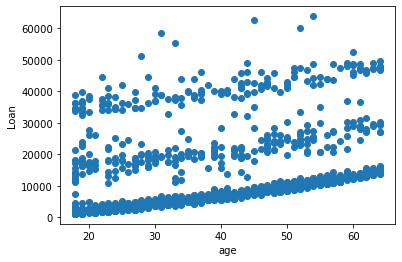

In [216]:
plt.scatter(x1,y)
plt.xlabel("age")
plt.ylabel("Loan")

Text(0, 0.5, 'Loan')

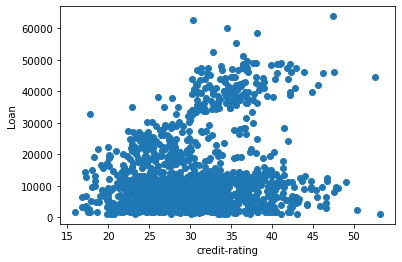

In [217]:
plt.scatter(x2,y)
plt.xlabel("credit-rating")
plt.ylabel("Loan")

Text(0, 0.5, 'Loan')

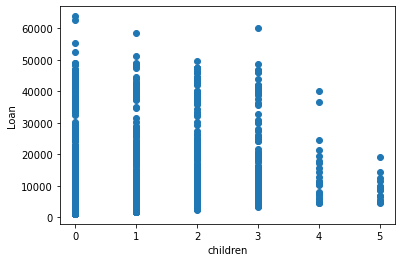

In [218]:
plt.scatter(x3,y)
plt.xlabel("children")
plt.ylabel("Loan")

In [219]:
n = len(x1)
n

1338

In [220]:
#creating a ones matrix
x_bias = np.ones((n,1))

In [221]:
x1_new = np.reshape(x1,(n,1))
x2_new = np.reshape(x2,(n,1))
x3_new = np.reshape(x3,(n,1))

In [222]:
x_new = np.append(x_bias,x1_new,axis=1)
x_new = np.append(x_new,x2_new,axis=1)
x_new = np.append(x_new,x3_new,axis=1)

In [223]:
x_new

array([[ 1.  , 19.  , 27.9 ,  0.  ],
       [ 1.  , 18.  , 42.13,  1.  ],
       [ 1.  , 28.  , 33.  ,  3.  ],
       ...,
       [ 1.  , 18.  , 36.85,  0.  ],
       [ 1.  , 21.  , 25.8 ,  0.  ],
       [ 1.  , 61.  , 29.07,  0.  ]])

In [224]:
#finding transpose of x_new
x_new_transpose = np.transpose(x_new)

In [225]:
#finding dot product of original and transpose matrix
x_new_transpose_dot_x_new = x_new_transpose.dot(x_new)

In [226]:
#finding inverse
temp_1 = np.linalg.inv(x_new_transpose_dot_x_new)

In [227]:
#finding dot product of x_new_transpose and y
temp_2 = x_new_transpose.dot(y)

In [228]:
#finding coefficients
thetha = temp_1.dot(temp_2)
thetha

array([-6870.54127124,   240.30897518,   330.11974334,   542.97054375])

In [229]:
t0 = thetha[0]
t1 = thetha[1]
t2 = thetha[2]
t3 = thetha[3]

print(t0)
print(t1)
print(t2)
print(t3)

-6870.541271241265
240.3089751813087
330.11974334338083
542.9705437548255


In [230]:
def preds(t0,t1,t2,t3,x1,x2,x3):
    predicted_value = t0 + x1*t1 + x2*t2 + x3*t3
    return predicted_value

In [231]:
#cost function
def get_cost(t0,t1,t2,t3):
    pred = preds(t0,t1,t2,t3,x1,x2,x3)
    J = (pred-y)**2
    J = J.mean()
    J = J/2
    return (J)

In [232]:
#gradients
def get_gradients(t0,t1,t2,t3):
    #find predictions for all the samples and calculate the gradient
    pred = preds(t0,t1,t2,t3,x1,x2,x3)
    g0 = (pred-y).mean()
    g1 = ((pred-y)*x1).mean() #each value multiplies with other inside an array
    g2 = ((pred-y)*x2).mean()
    g3 = ((pred-y)*x3).mean()
    return (g0,g1,g2,g3)

In [233]:
#update my parameters
#optimizer
def update(t0,t1,t2,t3):
    (g0,g1,g2,g3) = get_gradients(t0,t1,t2,t3)
    t0 = t0-alpha*(g0) #g0 means dowj/dowtheta
    t1 = t1-alpha*(g1)
    t2 = t2-alpha*(g2)
    t3 = t2-alpha*(g3)
    return (t0,t1,t2,t3)

In [234]:
#fit the model/optimize
def fit(t0,t1,t2,t3):
    cost_progress = []
    #training loop
    for i in range(itr):
        t0,t1,t2,t3 = update(t0,t1,t2,t3)
        cost = get_cost(t0,t1,t2,t3)
        cost_progress.append(cost)
    return (t0,t1,t2,t3,cost_progress)

In [235]:
t0,t1,t2,t3,cost_progress = fit(t0,t1,t2,t3)

In [236]:
print(t0,t1,t2,t3)

-6870.368296509345 242.79003745298436 334.13980110740556 334.1707708772272


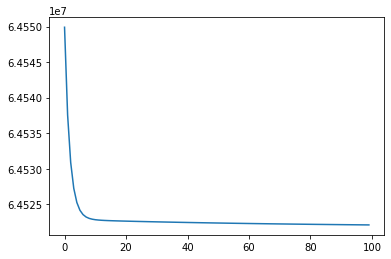

In [237]:
plt.plot(cost_progress)

In [238]:
def mse():
    pred = preds(t0,t1,t2,t3,x1,x2,x3)
    g0 = ((preds-y)**2).mean()
    g1 = (((preds-y)*x1)**2).mean()
    g2 = (((preds-y)*x2)**2).mean()
    g3 = (((preds-y)*x3)**2).mean()
    print(g0,g1,g2,g3)
mse()

TypeError: unsupported operand type(s) for -: 'function' and 'float'